<a href="https://colab.research.google.com/github/r2x4/prueba_cac_abogados/blob/main/cac_abogados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prueba CAC Abogados**

In [1]:
# llamar datos

import pandas as pd

#datos = pd.read_csv('/content/datos1.csv', encoding='latin1')

datos = pd.read_csv('C:/Users/rrs23/OneDrive/Documentos/cac_abogado/datos1.csv', encoding='latin1')



In [2]:
datos.sample(7)

,FECHA_EVOLUCION,IDENTIFICACION,NOMBRE_TITULAR,SALDO_TOTAL_CLIENTE,RXM_ACTUAL,TIPO_CLIENTE,LINEA_CLIENTE,LINEA_PRODUCTO,MACROPORTAFOLIO,EXM_INICIAL,Fecha_asignacion
538835,31/12/2024,1.110509e+09,URUENA TRUJILLO LUIS ENRIQUE,29983652.0,9999.0,Clasico,CS,CS,LBMP,CASTIGO,2024/12
456943,30/09/2024,8.604649e+06,RUIZ BAYUELO EDINSON JOSE,128069712.0,90.0,Clasico,CH,CH,HIPOTECARIO,E120,2024/09
619771,31/01/2025,1.083891e+09,VARGAS VARGAS GERMAN ALBERTO,60776600.0,0.0,Clasico,CS,CS,MULTICS,MIXTO,2025/01
327012,30/06/2024,9.859139e+07,RESTREPO AMAYA LUIS CARLOS,351593364.0,9999.0,n.d,CS,CS,MULTICS,CASTIGO,2024/06
659599,28/02/2025,1.129566e+09,LIDUENAS BLANQUICETT JOSE DANI,239655135.0,60.0,Clasico,CH,CH,HIPOTECARIO,E60,2025/02
567160,31/12/2024,1.128282e+09,MELKIN A POSADA M,150507432.0,9999.0,n.d,CS,NaN,VEHICULO,MIXTO,2024/12
535536,31/10/2024,8.545670e+07,GIRALDO LLANO NELSON ANDRES,15815171.0,150.0,Clasico,CS,CS,MULTICS,E120,2024/10


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664293 entries, 0 to 664292
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FECHA_EVOLUCION      664292 non-null  object 
 1   IDENTIFICACION       664292 non-null  float64
 2   NOMBRE_TITULAR       664112 non-null  object 
 3   SALDO_TOTAL_CLIENTE  664112 non-null  float64
 4   RXM_ACTUAL           650871 non-null  float64
 5   TIPO_CLIENTE         664292 non-null  object 
 6   LINEA_CLIENTE        664292 non-null  object 
 7   LINEA_PRODUCTO       520154 non-null  object 
 8   MACROPORTAFOLIO      664292 non-null  object 
 9   EXM_INICIAL          664292 non-null  object 
 10  Fecha_asignacion     664293 non-null  object 
dtypes: float64(3), object(8)
memory usage: 55.7+ MB


In [4]:
# datos nulos
datos.isnull().sum()

FECHA_EVOLUCION             1
IDENTIFICACION              1
NOMBRE_TITULAR            181
SALDO_TOTAL_CLIENTE       181
RXM_ACTUAL              13422
TIPO_CLIENTE                1
LINEA_CLIENTE               1
LINEA_PRODUCTO         144139
MACROPORTAFOLIO             1
EXM_INICIAL                 1
Fecha_asignacion            0
dtype: int64

In [5]:
datos.describe()

,IDENTIFICACION,SALDO_TOTAL_CLIENTE,RXM_ACTUAL
count,6.642920e+05,6.641120e+05,650871.000000
mean,4.715052e+08,1.180369e+08,4467.062114
std,5.036787e+08,1.588102e+08,4929.063091
min,2.522000e+04,0.000000e+00,0.000000
25%,4.166254e+07,1.783153e+07,60.000000
50%,8.065687e+07,6.450916e+07,180.000000
75%,1.045744e+09,1.568415e+08,9999.000000
max,2.000011e+09,1.254467e+10,9999.000000


In [6]:
datos.dtypes

FECHA_EVOLUCION         object
IDENTIFICACION         float64
NOMBRE_TITULAR          object
SALDO_TOTAL_CLIENTE    float64
RXM_ACTUAL             float64
TIPO_CLIENTE            object
LINEA_CLIENTE           object
LINEA_PRODUCTO          object
MACROPORTAFOLIO         object
EXM_INICIAL             object
Fecha_asignacion        object
dtype: object

In [7]:
datos.shape

(664293, 11)

# **Limpieza y Graficacion**

In [8]:
# 1. Eliminar duplicados
datos.drop_duplicates(inplace=True)

# 2. Eliminar filas con datos esenciales nulos
datos.dropna(subset=['IDENTIFICACION', 'SALDO_TOTAL_CLIENTE'], inplace=True)

# 3. Rellenar valores nulos para columnas no críticas
datos['LINEA_PRODUCTO'] = datos['LINEA_PRODUCTO'].fillna("SIN DATO")
datos['RXM_ACTUAL'] = datos['RXM_ACTUAL'].fillna(0)

# 4. Convertir fechas a formato datetime
datos['FECHA_EVOLUCION'] = pd.to_datetime(datos['FECHA_EVOLUCION'], errors='coerce')
datos['Fecha_asignacion'] = pd.to_datetime(datos['Fecha_asignacion'], errors='coerce')


C:\Users\rrs23\AppData\Local\Temp\ipykernel_11772\3141977968.py:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  datos['FECHA_EVOLUCION'] = pd.to_datetime(datos['FECHA_EVOLUCION'], errors='coerce')
C:\Users\rrs23\AppData\Local\Temp\ipykernel_11772\3141977968.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos['Fecha_asignacion'] = pd.to_datetime(datos['Fecha_asignacion'], errors='coerce')


# **Graficacion**

In [9]:
# Crear columna de riesgo y su clasificación
datos['RIESGO_CLIENTE'] = datos['RXM_ACTUAL'] / (datos['SALDO_TOTAL_CLIENTE'] + 1)

datos['CLASIFICACION_RIESGO'] = pd.cut(
    datos['RIESGO_CLIENTE'],
    bins=[-1, 0.2, 0.5, 1, float('inf')],
    labels=['BAJO', 'MEDIO', 'ALTO', 'MUY ALTO']
)


In [10]:
print(datos.head())  # para ver las primeras filas

  FECHA_EVOLUCION  IDENTIFICACION                 NOMBRE_TITULAR  \
0      2024-04-30    9.122125e+07            PINA ARDILA ARGELIO   
1      2024-04-30    8.311640e+07             JUAN C BOHORQUEZ H   
2      2024-04-30    1.979229e+06  SIERRA ROCHELS LUMAR FERNANDO   
3      2024-04-30    1.143395e+09                JOHN MANFIOLI L   
4      2024-04-30    7.921502e+07      RODRIGUEZ GARZON GEOVANNI   

   SALDO_TOTAL_CLIENTE  RXM_ACTUAL TIPO_CLIENTE LINEA_CLIENTE LINEA_PRODUCTO  \
0           12058348.0       120.0          n.d            CS             CS   
1          385283311.0      9999.0          n.d            CS       SIN DATO   
2          139268921.0      9999.0      Clasico            CS             CS   
3           44701952.0         0.0          n.d            CS       SIN DATO   
4          298599530.0      9999.0          n.d            CH             CS   

  MACROPORTAFOLIO EXM_INICIAL Fecha_asignacion  RIESGO_CLIENTE  \
0          MONOCX         E90       2024-04-

In [11]:
print(datos['CLASIFICACION_RIESGO'].value_counts())


CLASIFICACION_RIESGO
BAJO        557037
MUY ALTO         1
MEDIO            0
ALTO             0
Name: count, dtype: int64


Valores nulos por columna:
 FECHA_EVOLUCION             0
IDENTIFICACION              0
NOMBRE_TITULAR              0
SALDO_TOTAL_CLIENTE         0
RXM_ACTUAL                  0
TIPO_CLIENTE                0
LINEA_CLIENTE               0
LINEA_PRODUCTO              0
MACROPORTAFOLIO             0
EXM_INICIAL                 0
Fecha_asignacion        45388
RIESGO_CLIENTE              0
CLASIFICACION_RIESGO        0
dtype: int64

Distribución de riesgo:
 CLASIFICACION_RIESGO
BAJO        557037
MEDIO            0
ALTO             0
MUY ALTO         1
Name: count, dtype: int64


C:\Users\rrs23\AppData\Local\Temp\ipykernel_11772\2296741865.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_riesgo.index, y=conteo_riesgo.values, palette='viridis')


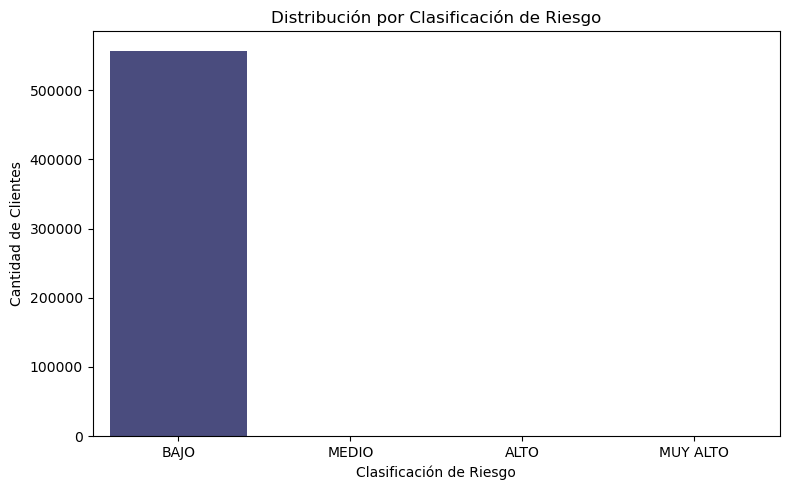

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


print("Valores nulos por columna:\n", datos.isnull().sum())


conteo_riesgo = datos['CLASIFICACION_RIESGO'].value_counts().sort_index()
print("\nDistribución de riesgo:\n", conteo_riesgo)


plt.figure(figsize=(8, 5))
sns.barplot(x=conteo_riesgo.index, y=conteo_riesgo.values, palette='viridis')
plt.title('Distribución por Clasificación de Riesgo')
plt.xlabel('Clasificación de Riesgo')
plt.ylabel('Cantidad de Clientes')
plt.tight_layout()
plt.show()


# **Clasificacion de Riesgo por producto**

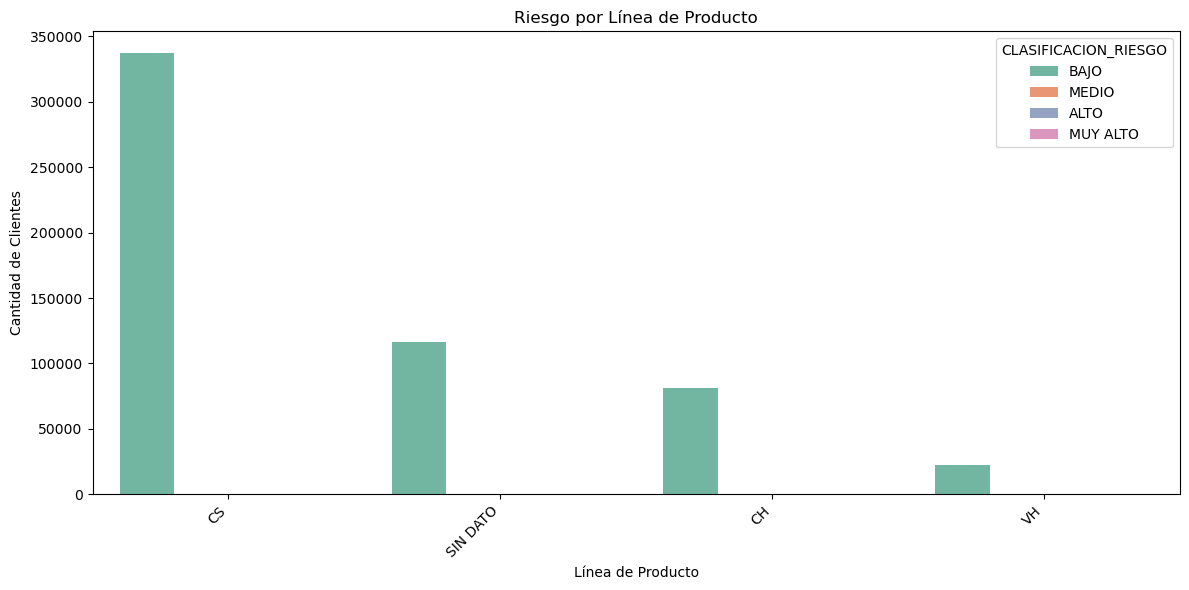

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=datos, x='LINEA_PRODUCTO', hue='CLASIFICACION_RIESGO', palette='Set2')
plt.title('Riesgo por Línea de Producto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Línea de Producto')
plt.tight_layout()
plt.show()




# **promedio**

C:\Users\rrs23\AppData\Local\Temp\ipykernel_11772\1550125982.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


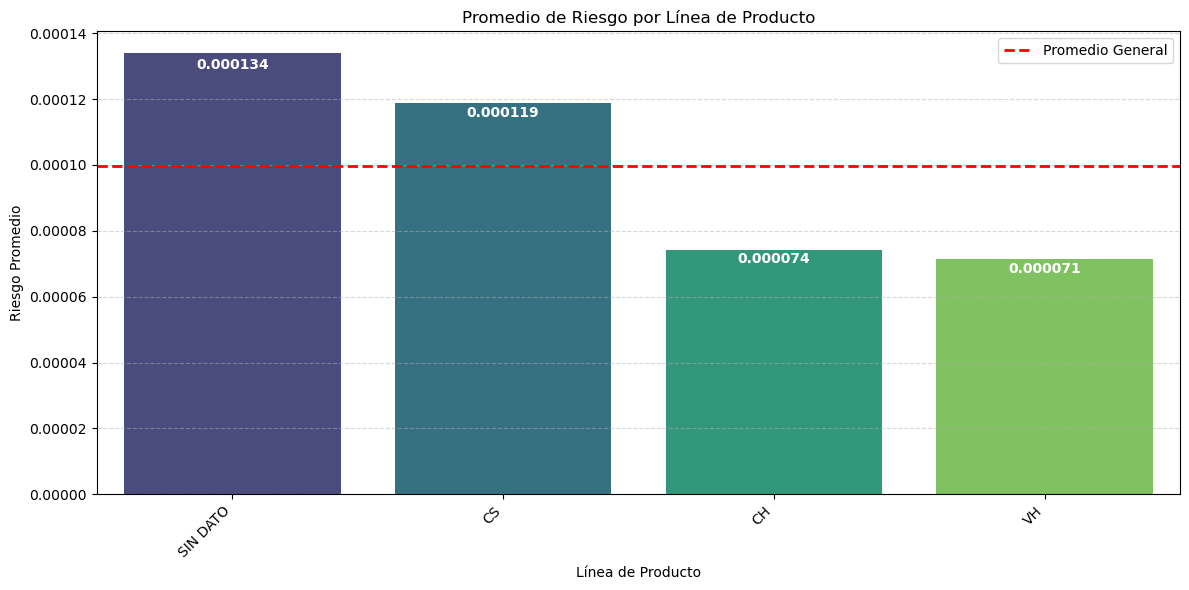

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


riesgo_medio = datos.groupby('LINEA_PRODUCTO')['RIESGO_CLIENTE'].mean().sort_values(ascending=False)


df_riesgo = riesgo_medio.reset_index()
df_riesgo.columns = ['LINEA_PRODUCTO', 'RIESGO_PROMEDIO']


plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_riesgo,
    x='LINEA_PRODUCTO',
    y='RIESGO_PROMEDIO',
    palette='viridis'
)


for i, fila in df_riesgo.iterrows():
    ax.text(
        i,
        fila['RIESGO_PROMEDIO'] * 0.99,
        f"{fila['RIESGO_PROMEDIO']:.6f}",
        ha='center',
        va='top',
        fontsize=10,
        color='white',
        fontweight='bold'
    )


promedio_general = df_riesgo['RIESGO_PROMEDIO'].mean()
plt.axhline(y=promedio_general, color='red', linestyle='--', linewidth=2, label='Promedio General')

plt.xticks(rotation=45, ha='right')
plt.ylabel('Riesgo Promedio')
plt.xlabel('Línea de Producto')
plt.title('Promedio de Riesgo por Línea de Producto')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


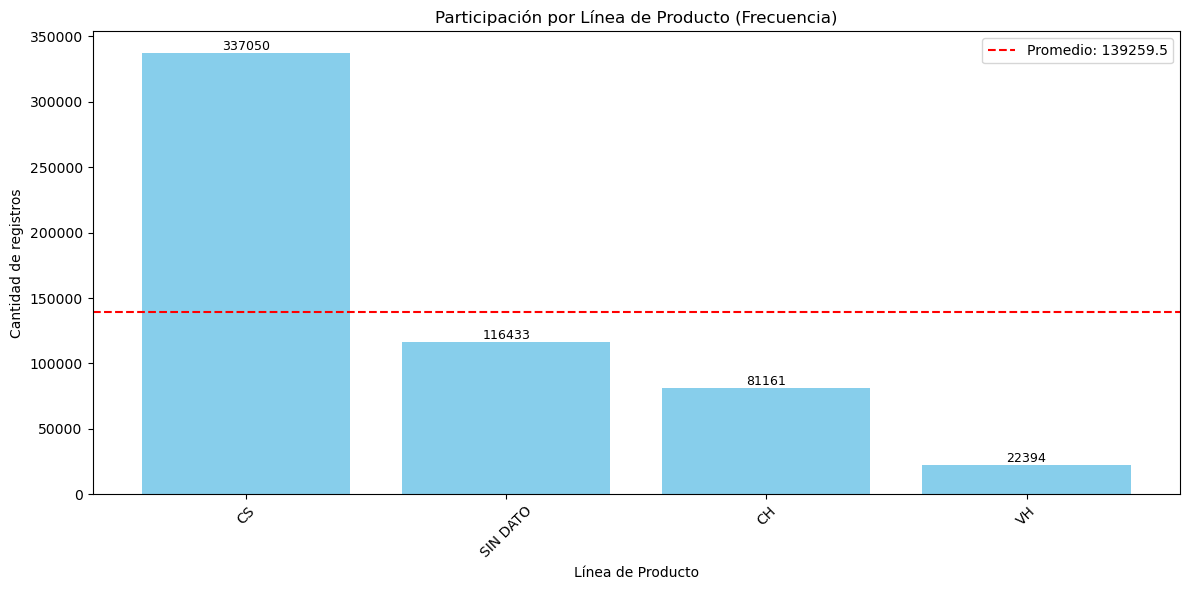

In [15]:
import matplotlib.pyplot as plt


df_participacion = datos['LINEA_PRODUCTO'].value_counts().reset_index()
df_participacion.columns = ['LINEA_PRODUCTO', 'CANTIDAD']

media = df_participacion['CANTIDAD'].mean()

plt.figure(figsize=(12, 6))
barras = plt.bar(df_participacion['LINEA_PRODUCTO'], df_participacion['CANTIDAD'], color='skyblue')


for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 1, f'{int(altura)}',
             ha='center', va='bottom', fontsize=9)


plt.axhline(media, color='red', linestyle='--', label=f'Promedio: {media:.1f}')


plt.title('Participación por Línea de Producto (Frecuencia)')
plt.xlabel('Línea de Producto')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Habilitar gráficos en Jupyter
%matplotlib inline
# Agrupación por RIESGO_CLIENTE
df_riesgo = datos.groupby('RIESGO_CLIENTE')['SALDO_TOTAL_CLIENTE'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(10, 5))
barras = plt.bar(df_riesgo['RIESGO_CLIENTE'], df_riesgo['SALDO_TOTAL_CLIENTE'], color='mediumseagreen')

# Etiquetas encima de las barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 10000, f'{int(altura):,}',
             ha='center', va='bottom', fontsize=8)

plt.title('Saldo Promedio por Riesgo del Cliente')
plt.xlabel('Riesgo del Cliente')
plt.ylabel('Saldo Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
print(datos.head())
print(datos.columns)
print(datos.dtypes)